In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import wquantiles
from statsmodels import robust
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
state = pd.read_csv('./data/state.csv')

# Single Variate Meaures

In [4]:
mean = float(state['Population'].mean())
trimmed_mean = float(trim_mean(state['Population'], 0.1))
median = float(state['Population'].median())
weighted_mean = float(np.average(state['Murder.Rate'], weights=state['Population']))
weighted_median = float(wquantiles.median(state['Murder.Rate'], weights=state['Population']))
print(f'Mean: {mean}')
print(f'Trimmed mean: {trimmed_mean}')
print(f'Median: {median}')
print(f'Weighted mean: {weighted_mean}')
print(f'Weighted median: {weighted_median}')

Mean: 6162876.3
Trimmed mean: 4783697.125
Median: 4436369.5
Weighted mean: 4.445833981123393
Weighted median: 4.4


In [5]:
std = float(state['Population'].std())
iqr = float(state['Population'].quantile(0.75)) - float(state['Population'].quantile(0.25))
mad = float(robust.scale.mad(state['Population']))
print(f'Std dev: {std}')
print(f'IQR: {iqr}')
print(f'MAD: {mad}')

Std dev: 6848235.347401142
IQR: 4847308.0
MAD: 3849876.1459979336


In [6]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

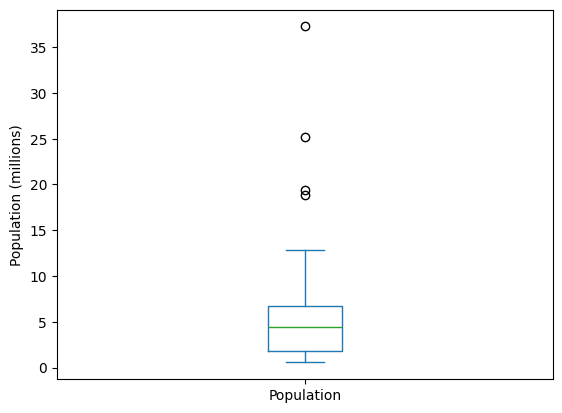

In [7]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [8]:
binnedPopulation = pd.cut(state['Population'], bins=10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

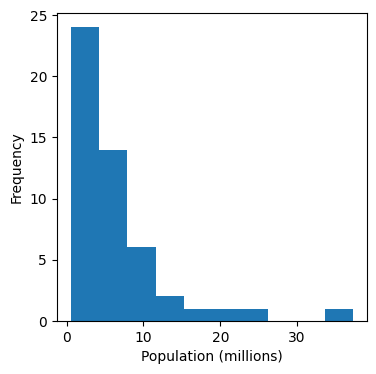

In [9]:
ax = (state['Population']/1000000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

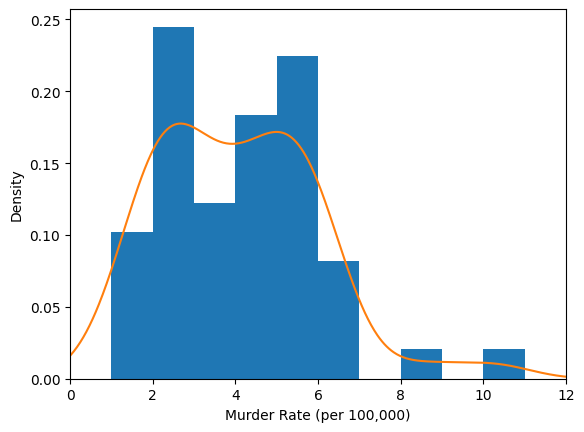

In [10]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

Text(0, 0.5, 'Count')

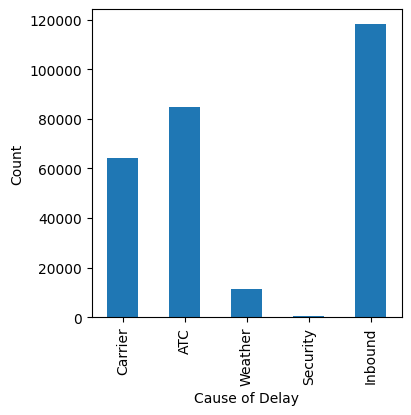

In [11]:
dfw = pd.read_csv('./data/dfw_airline.csv')
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

# Binary Variate

In [12]:
sp500_data = pd.read_csv("./data/sp500_data.csv")
sp500_sector = pd.read_csv("./data/sp500_sectors.csv")

<Axes: >

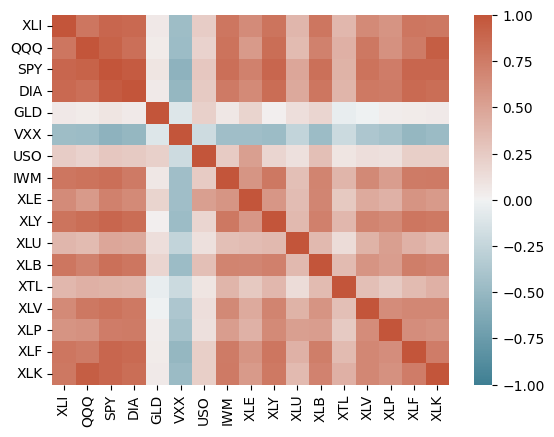

In [13]:
etf = sp500_data.loc[sp500_data['Unnamed: 0'] > '2012-07-01', sp500_sector[sp500_sector['sector'] == 'etf']['symbol']]
sns.heatmap(etf.corr(), vmax=1,vmin=-1, cmap=sns.diverging_palette(220, 20, as_cmap=True))

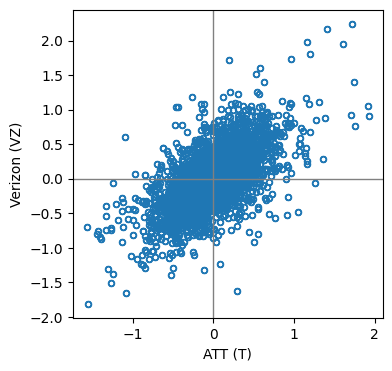

In [14]:
telecom = sp500_data
ax = telecom.plot.scatter(x='T',y='VZ', figsize = (4, 4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In [15]:
kc_tax = pd.read_csv("./data/kc_tax.csv")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue<750000) & (kc_tax.SqFtTotLiving>100) & (kc_tax.SqFtTotLiving<3500),:]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax Assessed Value')

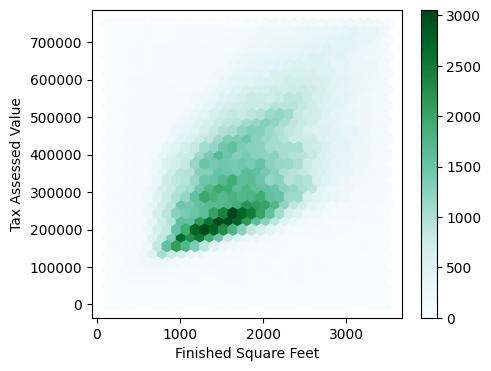

In [16]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

Text(0, 0.5, 'Tax Assessed Value')

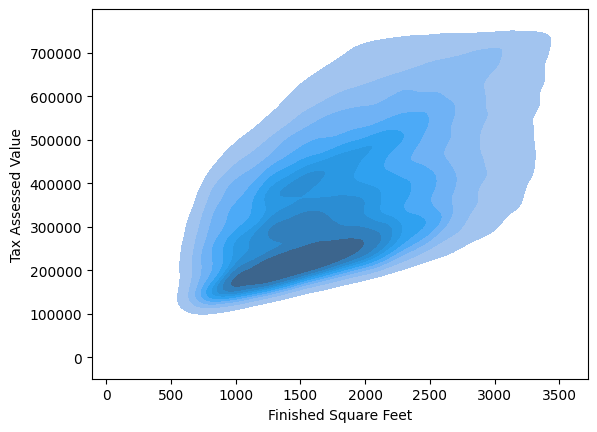

In [17]:
ax = sns.kdeplot(x=kc_tax0.SqFtTotLiving, y=kc_tax0.TaxAssessedValue,fill=True)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

In [18]:
loans = pd.read_csv("./data/lc_loans.csv")

In [19]:
cross_tab = loans.pivot_table(index='grade', columns='status', aggfunc=lambda x : len(x), margins=True)

df = cross_tab.loc['A':'G', :].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].astype(float).div(df['All'], axis=0)
df['All'] = df['All'].astype(float) / sum(df['All'])
perc_cross_tab = df
perc_cross_tab.head()

C:\Users\HiteshKadam\AppData\Local\Temp\ipykernel_1396\4112899439.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].astype(float).div(df['All'], axis=0)
C:\Users\HiteshKadam\AppData\Local\Temp\ipykernel_1396\4112899439.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].astype(float).div(df['All'], axis=0)
C:\Users\HiteshKadam\AppData\Local\Temp\ipykernel_1396\4112899439.py:4: FutureW

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177


In [20]:
airline = pd.read_csv("./data/airline_stats.csv")

Text(0.5, 0.98, '')

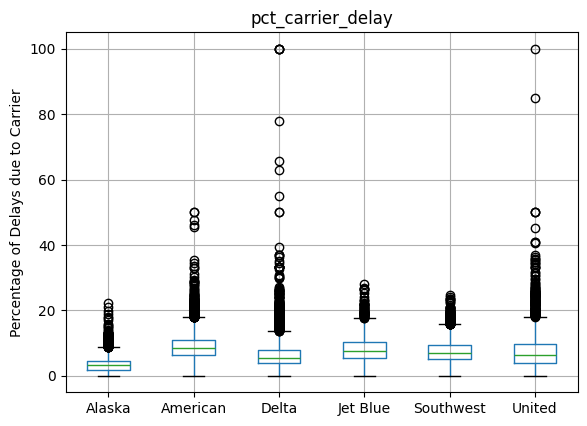

In [21]:
ax = airline.boxplot(column='pct_carrier_delay', by='airline')
ax.set_xlabel('')
ax.set_ylabel('Percentage of Delays due to Carrier')
plt.suptitle('')

Text(0, 0.5, 'Percentage of Delays due to Carrier')

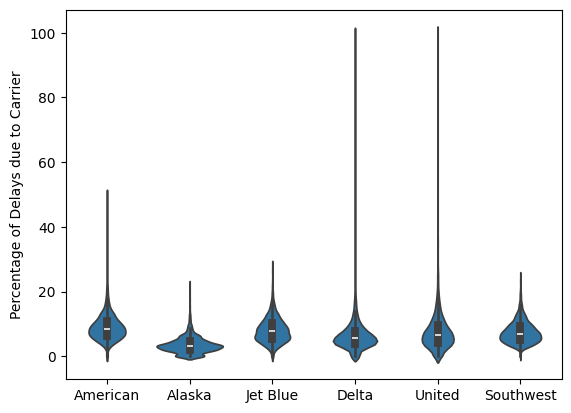

In [22]:
ax = sns.violinplot(x=airline.airline, y=airline.pct_carrier_delay)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Delays due to Carrier')

# Multi Variate

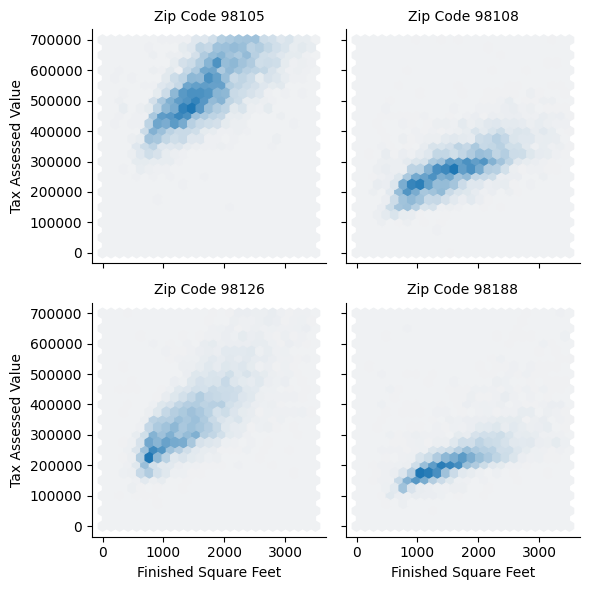

In [25]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip


def hexbin(x,y,color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x,y,gridsize=25,cmap=cmap,**kwargs)

g = sns.FacetGrid(kc_tax_zip, col="ZipCode", col_wrap=2)
g.map(hexbin, "SqFtTotLiving", "TaxAssessedValue", extent = [0,3500,0,700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip Code {col_name:.0f}')